<a href="https://colab.research.google.com/github/Nick1467/tight-binding-model/blob/main/Blochwavefn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#能帶分佈

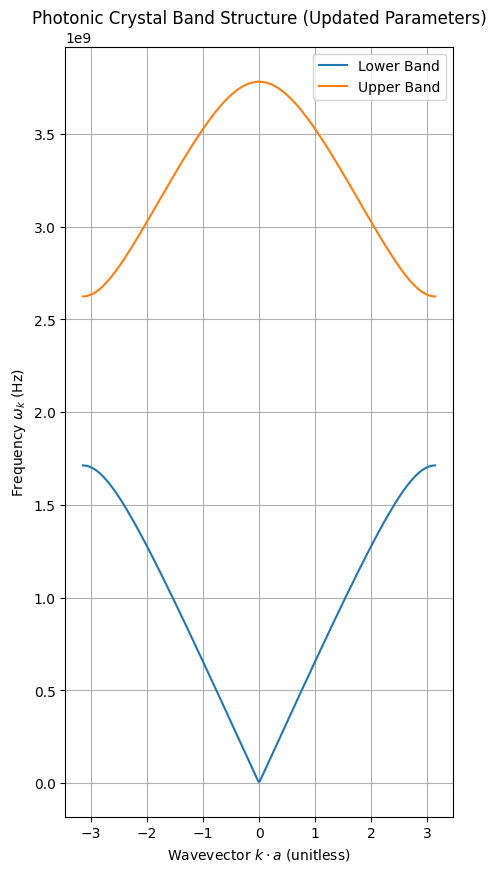

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Updated Constants
Z_lo = 26.17  # Ohms
Z_hi = 85.13  # Ohms
L_lo = 7.565e-3  # meters
L_hi = 34e-3  # meters
vp = 1.91e8  # m/s, phase velocity
a = L_lo + L_hi  # unit cell length

# Dispersion relation function
def dispersion_eq(omega, k):
    lhs = np.cos(k * a)
    theta_lo = omega * L_lo / vp
    theta_hi = omega * L_hi / vp
    rhs = np.cos(theta_lo) * np.cos(theta_hi) - 0.5 * (Z_hi / Z_lo + Z_lo / Z_hi) * np.sin(theta_lo) * np.sin(theta_hi)
    return lhs - rhs

# k values in the Brillouin zone
k_vals = np.linspace(-np.pi / a, np.pi / a, 300)
omega_lower_band = []
omega_2nd_band = []

# Solve dispersion equation for each k in two different brackets to capture two bands
for k in k_vals:
    # Lower band
    try:
        sol_lower = root_scalar(dispersion_eq, args=(k,), bracket=[1e2 * 2 * np.pi, 2e9 * 2 * np.pi], method='brentq')
        if sol_lower.converged:
            omega_lower_band.append(sol_lower.root / (2 * np.pi))  # Convert from rad/s to Hz
        else:
            omega_lower_band.append(np.nan)
    except ValueError:
        omega_lower_band.append(np.nan)

    # Upper band
    try:
        sol_upper = root_scalar(dispersion_eq, args=(k,), bracket=[2.1e9 * 2 * np.pi, 5e9 * 2 * np.pi], method='brentq')
        if sol_upper.converged:
            omega_2nd_band.append(sol_upper.root / (2 * np.pi))  # Convert from rad/s to Hz
        else:
            omega_2nd_band.append(np.nan)
    except ValueError:
        omega_2nd_band.append(np.nan)

# Convert k to unitless for plotting
k_unitless = k_vals * a

# Plot both bands
plt.figure(figsize=(5, 10))
plt.plot(k_unitless, omega_lower_band, label='Lower Band')
plt.plot(k_unitless, omega_2nd_band, label='Upper Band')
plt.xlabel(r'Wavevector $k \cdot a$ (unitless)')
plt.ylabel(r'Frequency $\omega_k$ (Hz)')
plt.title('Photonic Crystal Band Structure (Updated Parameters)')
plt.grid(True)
plt.legend()
plt.show()


## 嘗試4能帶

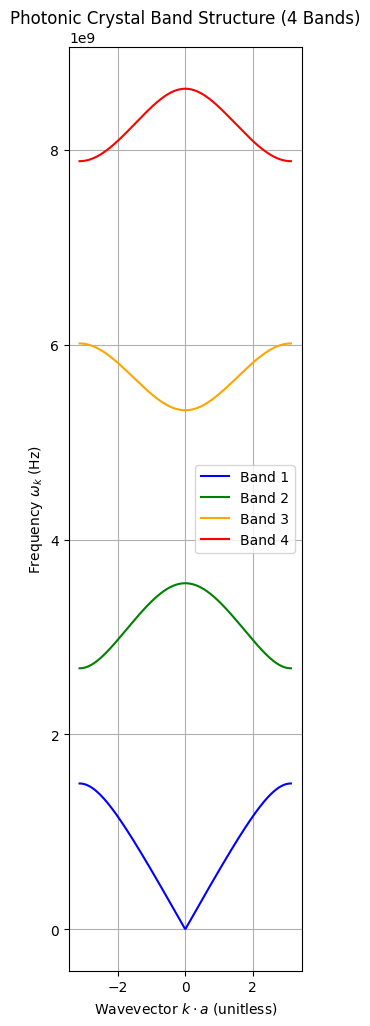

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Use the updated photonic crystal parameters again
Z_lo = 26.17  # Ohms
Z_hi = 125.13  # Ohms
L_lo = 7.565e-3  # meters
L_hi = 34e-3  # meters
vp = 1.91e8  # m/s, phase velocity
a = L_lo + L_hi  # unit cell length

# Define the dispersion equation
def dispersion_eq(omega, k):
    lhs = np.cos(k * a)
    theta_lo = omega * L_lo / vp
    theta_hi = omega * L_hi / vp
    rhs = np.cos(theta_lo) * np.cos(theta_hi) - 0.5 * (Z_hi / Z_lo + Z_lo / Z_hi) * np.sin(theta_lo) * np.sin(theta_hi)
    return lhs - rhs

# Define k values
k_vals = np.linspace(-np.pi / a, np.pi / a, 300)
bands = [[] for _ in range(4)]  # to store 4 bands

# For each k, attempt to find up to 4 roots (bands)
for k in k_vals:
    brackets = [
        [0.0001e9 * 2 * np.pi, 2e9 * 2 * np.pi],
        [2.5e9 * 2 * np.pi, 4e9 * 2 * np.pi],
        [4.3e9 * 2 * np.pi, 6.9e9 * 2 * np.pi],
        [6.8e9 * 2 * np.pi, 10e9 * 2 * np.pi]
    ]
    for i, bracket in enumerate(brackets):
        try:
            sol = root_scalar(dispersion_eq, args=(k,), bracket=bracket, method='brentq')
            if sol.converged:
                bands[i].append(sol.root / (2 * np.pi))  # Convert to Hz
            else:
                bands[i].append(np.nan)
        except ValueError:
            bands[i].append(np.nan)

# Convert k to unitless
k_unitless = k_vals * a

# Plot all 4 bands
plt.figure(figsize=(3, 12))
colors = ['blue', 'green', 'orange', 'red']
for i in range(4):
    plt.plot(k_unitless, bands[i], label=f'Band {i+1}', color=colors[i])
plt.xlabel(r'Wavevector $k \cdot a$ (unitless)')
plt.ylabel(r'Frequency $\omega_k$ (Hz)')
plt.title('Photonic Crystal Band Structure (4 Bands)')
plt.grid(True)
plt.legend()
plt.show()


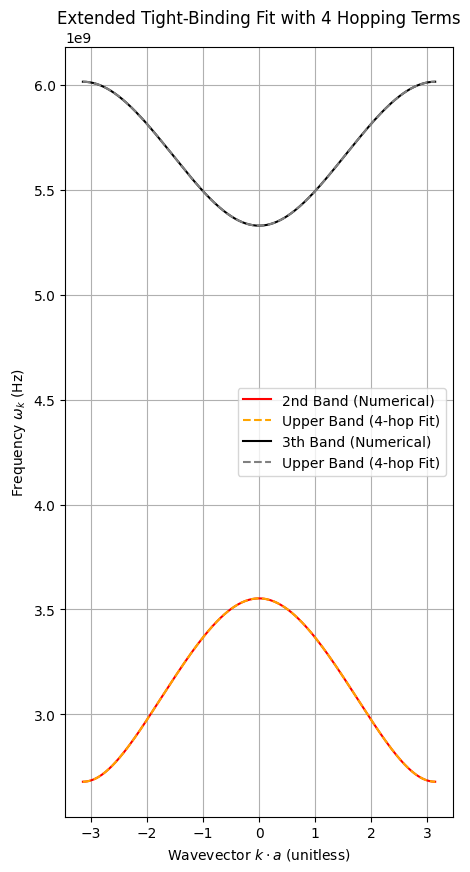

Fitted parameters for Band 1:
  Parameter 1: 0.8774725467261851
  Parameter 2: 0.3257336142531118
  Parameter 3: 0.033911562370987074
  Parameter 4: 0.02461845941892544
  Parameter 5: 0.011402948431835204
  Parameter 6: 0.00796752371101922
  Parameter 7: 0.005312828088960248
Fitted parameters for Band 2:
  Parameter 1: 3.134532555831758
  Parameter 2: -0.21432868086677612
  Parameter 3: 0.008518989939060988
  Parameter 4: -0.003761162538237827
  Parameter 5: 0.0006047612651488337
  Parameter 6: -0.00021349521712723241
  Parameter 7: 5.286912992482372e-05
Fitted parameters for Band 3:
  Parameter 1: 5.672998177440506
  Parameter 2: 0.16998875466639524
  Parameter 3: 0.0009627995303294545
  Parameter 4: 0.001398268093454503
  Parameter 5: 3.365054394249034e-05
  Parameter 6: 3.130643225498054e-05
  Parameter 7: 1.3530414145444754e-06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Clean data
k = np.array(k_unitless)
omega_1st = np.array(bands[0])
omega_2nd = np.array(bands[1])
omega_3th = np.array(bands[2])
omega_4th = np.array(bands[3])

# Keep only valid data
valid_lower = ~np.isnan(omega_1st)
valid_upper = ~np.isnan(omega_2nd)
k_lower = k[valid_lower]
omega_1st = omega_1st[valid_lower]
k_upper = k[valid_upper]
omega_2nd = omega_2nd[valid_upper]

# Extended tight-binding model with 4 hopping terms
def extended_tb_4hop(k, omega0, J1, J2, J3, J4, J5, J6):
    return (omega0
            - 2 * J1 * np.cos(k)
            - 2 * J2 * np.cos(2 * k)
            - 2 * J3 * np.cos(3 * k)
            - 2 * J4 * np.cos(4 * k)
            - 2 * J5 * np.cos(5 * k)
            - 2 * J6 * np.cos(6 * k))

# Fit 1st band
popt_1st_4hop, _ = curve_fit(extended_tb_4hop, k_lower, omega_1st,
                               p0=[np.mean(omega_1st), 1e8, 1e7, 1e6, 1e6, 1e6, 1e6])
omega_fit_1st_4hop = extended_tb_4hop(k_lower, *popt_1st_4hop)

# Fit 2nd band
popt_2nd_4hop, _ = curve_fit(extended_tb_4hop, k_upper, omega_2nd,
                               p0=[np.mean(omega_2nd), 1e8, 1e7, 1e6, 1e6, 1e6, 1e6])
omega_fit_2nd_4hop = extended_tb_4hop(k_upper, *popt_2nd_4hop)

# Fit 3nd band
popt_3th_4hop, _ = curve_fit(extended_tb_4hop, k_upper, omega_3th,
                               p0=[np.mean(omega_3th), 1e8, 1e7, 1e6, 1e6, 1e6, 1e6])
omega_fit_3th_4hop = extended_tb_4hop(k_upper, *popt_3th_4hop)

# Plotting
plt.figure(figsize=(5, 10))
# plt.plot(k_lower, omega_1st, label='1st Band (Numerical)', color='blue')
# plt.plot(k_lower, omega_fit_1st_4hop, '--', label='Lower Band (4-hop Fit)', color='cyan')
plt.plot(k_upper, omega_2nd, label='2nd Band (Numerical)', color='red')
plt.plot(k_upper, omega_fit_2nd_4hop, '--', label='Upper Band (4-hop Fit)', color='orange')
plt.plot(k_upper, omega_3th, label='3th Band (Numerical)', color='black')
plt.plot(k_upper, omega_fit_3th_4hop, '--', label='Upper Band (4-hop Fit)', color='gray')
plt.xlabel(r'Wavevector $k \cdot a$ (unitless)')
plt.ylabel(r'Frequency $\omega_k$ (Hz)')
plt.title('Extended Tight-Binding Fit with 4 Hopping Terms')
plt.grid(True)
plt.legend()
plt.show()

# Return fitted parameters for inspection
for i, popt in enumerate([popt_1st_4hop, popt_2nd_4hop, popt_3th_4hop]):
    print(f"Fitted parameters for Band {i+1}:")
    for j, param in enumerate(popt):
        print(f"  Parameter {j+1}: {param/1e9}")


## s21模擬

In [ ]:
# Re-import necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve

# Parameters
N = 20  # number of cavities

inter_term = popt_lower_4hop
omega_0= inter_term[0]
J1 = inter_term[1]
J2 = inter_term[2]
J3 = inter_term[3]
J4 = inter_term[4]
J5 = inter_term[5]
J6 = inter_term[6]



# External coupling at boundaries
kappa_c = 10e6  # external coupling rate (Hz)
gamma = 5e5    # internal loss (Hz)

# Build Hamiltonian (N x N)
H = np.zeros((N, N), dtype=complex)
for i in range(N):
    H[i, i] = omega_0 - 1j * (gamma + (kappa_c if i in [0, N-1] else 0)) / 2
    if i + 1 < N:
        H[i, i+1] = H[i+1, i] = -J1
    if i + 2 < N:
        H[i, i+2] = H[i+2, i] = -J2
    if i + 3 < N:
        H[i, i+3] = H[i+3, i] = -J3
    if i + 4 < N:
        H[i, i+4] = H[i+4, i] = -J4
    if i + 5 < N:
        H[i, i+5] = H[i+5, i] = -J5
    if i + 6 < N:
        H[i, i+6] = H[i+6, i] = -J6

# Solve for S21

# Frequency sweep
freqs = np.linspace(omega_0-1.5e9, omega_0+1.5e9, 1000)
S21 = []

# Solve (H - ω I) x = input, measure output at N-th site
for omega in freqs:
    A = H - omega * np.eye(N)
    b = np.zeros(N, dtype=complex)
    b[0] = np.sqrt(kappa_c)  # input drive at site 0
    x = solve(A, b)
    s21 = np.sqrt(kappa_c) * x[-1]  # output at site N-1
    S21.append(np.abs(s21)**2)

# Plot
plt.figure(figsize=(5, 6))
plt.plot(freqs / 1e9, 10*np.log10(S21))
#plt.plot(freqs / 1e9, (S21))
plt.legend(["dbm", "S21^2"])
plt.xlabel("Frequency (GHz)")
plt.ylabel(r"$|S_{21}|^2$")
plt.title("S21 Transmission Spectrum (Linear Algebra, No Qubit)")
plt.grid(True)
plt.show()


NameError: name 'popt_lower_4hop' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve

# ====== 系統參數 ======
N = 18                      # 共振腔數量
omega_0 = popt_upper_4hop[0]         # 共振腔本徵頻率 (Hz)
J1, J2, J3, J4, J5 = popt_upper_4hop[1], popt_upper_4hop[2], popt_upper_4hop[3], popt_upper_4hop[4], popt_upper_4hop[5]  # hopping strength
kappa_c = 5e6               # 外部耦合（左右端口）
gamma = 1e5                 # 每個腔體的損耗

# ====== Qubit 設定 ======
g = 20e6                    # Qubit 和腔體的耦合強度
Gamma = 5e5                 # Qubit 和腔體的損耗
qubit_site = 8              # Qubit 耦合到第幾個腔（從 0 開始）
qubit_freqs = np.linspace(3.65e9, 3.75e9, 500)  # Qubit 掃頻範圍

# ====== 探針掃描範圍 ======
probe_freqs = np.linspace(3.65e9, 3.75e9, 500)
S21_map = []

# ====== 預先建立共振腔系統的 Hamiltonian（不含 qubit） ======
H_base = np.zeros((N + 1, N + 1), dtype=complex)
for i in range(N):
    H_base[i, i] = omega_0 - 1j * (gamma + (kappa_c if i in [0, N - 1] else 0)) / 2
    if i + 1 < N:
        H_base[i, i + 1] = H_base[i + 1, i] = -J1
    if i + 2 < N:
        H_base[i, i + 2] = H_base[i + 2, i] = -J2
    if i + 3 < N:
        H_base[i, i + 3] = H_base[i + 3, i] = -J3
    if i + 4 < N:
        H_base[i, i + 4] = H_base[i + 4, i] = -J4
    if i + 5 < N:
        H_base[i, i + 5] = H_base[i + 5, i] = -J5
    if i + 6 < N:
        H_base[i, i + 6] = H_base[i + 6, i] = -J6

# ====== 掃描 qubit 頻率與每個探針頻率，解出 S21 傳輸 ======
for omega_q in qubit_freqs:
    H = H_base.copy()
    H[-1, -1] = omega_q                             # qubit 頻率放在最後一格
    H[qubit_site, -1] = H[-1, qubit_site] = g-1j*Gamma       # 與指定 cavity 耦合

    S21 = []
    for omega in probe_freqs:
        A = H - omega * np.eye(N + 1)
        b = np.zeros(N + 1, dtype=complex)
        b[0] = np.sqrt(kappa_c)                     # 從最左邊輸入
        x = solve(A, b)
        s21 = np.sqrt(kappa_c) * x[N - 1]           # 觀察最右邊輸出
        S21.append(10 * np.log10(np.abs(s21)))  # 轉為 dBm

    S21_map.append(S21)

# ====== 畫圖 ======
S21_map = np.array(S21_map)
plt.figure(figsize=(10, 6))
plt.imshow(S21_map, aspect='auto', origin='lower',
           extent=[probe_freqs[0]/1e9, probe_freqs[-1]/1e9, qubit_freqs[0]/1e9, qubit_freqs[-1]/1e9], vmax= -10,
           cmap='jet')
plt.colorbar(label='|S21|² (dBm)')
plt.xlabel('Probe Frequency (GHz)')
plt.ylabel('Qubit Frequency (GHz)')
plt.title('S21 Transmission vs Probe & Qubit Frequency')
plt.show()


## Lindblad 模擬 S21 傳輸譜

In [ ]:
!pip install qutip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# -------- 基本參數 --------
N = 5  # number of cavities
cutoff = 2  # photon number truncation
omega_0 = 952.96e6  # Hz
J1 = 354.8e6
J2 = 26.5e6
J3 = 24.1e6
J4 = 7.5e6

kappa_c = 5e6  # port 耦合 rate
gamma = 1e5    # internal loss
epsilon = 1e3  # 微弱連續驅動

# -------- 建立 annihilation operator list --------
a_list = [tensor([destroy(cutoff) if n == i else qeye(cutoff) for n in range(N)]) for i in range(N)]

# -------- Hamiltonian：tight-binding + hopping --------
H = 0
for i in range(N):
    H += omega_0 * a_list[i].dag() * a_list[i]
    if i + 1 < N:
        H += -J1 * (a_list[i].dag() * a_list[i+1] + a_list[i+1].dag() * a_list[i])
    if i + 2 < N:
        H += -J2 * (a_list[i].dag() * a_list[i+2] + a_list[i+2].dag() * a_list[i])
    if i + 3 < N:
        H += -J3 * (a_list[i].dag() * a_list[i+3] + a_list[i+3].dag() * a_list[i])
    if i + 4 < N:
        H += -J4 * (a_list[i].dag() * a_list[i+4] + a_list[i+4].dag() * a_list[i])

# -------- Collapse operators：包含端口與內部損耗 --------
c_ops = []
for i in range(N):
    total_loss = gamma + (kappa_c if i in [0, N-1] else 0)
    c_ops.append(np.sqrt(total_loss) * a_list[i])

# -------- 掃頻並解 steady-state --------
freqs = np.linspace(0.5e9, 2.5e9, 300)
S21 = []

for omega_d in freqs:
    # 驅動項（rotating frame）
    H_drive = epsilon * (a_list[0] + a_list[0].dag())
    H_rot = H - omega_d * sum(a.dag() * a for a in a_list) + H_drive

    # 解 steady-state density matrix
    rho_ss = steadystate(H_rot, c_ops)

    # 右端 cavity 的場強作為輸出
    S21.append(expect(a_list[N-1], rho_ss))

# -------- 畫圖 --------
plt.figure(figsize=(10, 5))
plt.plot(freqs / 1e9, 10*np.log10(np.abs(S21)))
plt.xlabel("Frequency (GHz)")
plt.ylabel(r"$|S_{21}|^2$")
plt.title("S21 Transmission Spectrum (Lindblad Master Equation)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# ----- 系統參數 -----
N = 5        # cavity 數量
cutoff = 3   # 每 cavity 最多 3 photons：Fock state 0–3
omega_0 = 952.96e6  # cavity resonance frequency (Hz)
J1 = 354.8e6
J2 = 26.5e6
J3 = 24.1e6
J4 = 7.5e6

omega_q = 952.96e6  # qubit 頻率
g = 50e6            # qubit-cavity 耦合強度

kappa_c = 5e6  # port 損耗
gamma = 1e5    # cavity 損耗
gamma_q = 1e4  # qubit 損耗
epsilon = 1e3  # 微弱驅動強度

qubit_site = 2  # qubit 接在第 3 個 cavity（index=2）

# ----- operator 產生 -----
def embed_op(op, target, total):
    return tensor([op if i == target else qeye(cutoff) for i in range(total)])

a_list = [tensor([destroy(cutoff) if i == n else qeye(cutoff) for i in range(N)] + [qeye(2)]) for n in range(N)]


# qubit operator (最後一位)
sm = tensor([qeye(cutoff) for _ in range(N)] + [sigmam()])
sp = sm.dag()

# ----- Hamiltonian -----
H = omega_q * sp * sm
for i in range(N):
    H += omega_0 * a_list[i].dag() * a_list[i]
    if i + 1 < N:
        H += -J1 * (a_list[i].dag() * a_list[i+1] + a_list[i+1].dag() * a_list[i])
    if i + 2 < N:
        H += -J2 * (a_list[i].dag() * a_list[i+2] + a_list[i+2].dag() * a_list[i])
    if i + 3 < N:
        H += -J3 * (a_list[i].dag() * a_list[i+3] + a_list[i+3].dag() * a_list[i])
    if i + 4 < N:
        H += -J4 * (a_list[i].dag() * a_list[i+4] + a_list[i+4].dag() * a_list[i])

# qubit-cavity interaction
H += g * (a_list[qubit_site] * sp + a_list[qubit_site].dag() * sm)

# drive from leftmost cavity
H_drive = epsilon * (a_list[0] + a_list[0].dag())

# ----- collapse operators -----
c_ops = []
for i in range(N):
    loss = gamma + (kappa_c if i in [0, N-1] else 0)
    c_ops.append(np.sqrt(loss) * a_list[i])
c_ops.append(np.sqrt(gamma_q) * sm)

# ----- frequency sweep -----
freqs = np.linspace(0.5e9, 2.5e9, 300)
S21 = []

for omega_d in freqs:
    H_rot = H - omega_d * (sum(a.dag() * a for a in a_list) + sp * sm) + H_drive
    rho_ss = steadystate(H_rot, c_ops)
    S21.append(expect(a_list[-1], rho_ss))  # 讀取最右端 cavity 輸出

# ----- plot -----
plt.figure(figsize=(10, 5))
plt.plot(freqs / 1e9, 10*np.log10(np.abs(S21)))
plt.xlabel("Frequency (GHz)")
plt.ylabel(r"$|S_{21}|^2$")
plt.title("S21 Spectrum with Qubit at Site 2 (N=5, Cutoff=4)")
plt.grid(True)
plt.tight_layout()
plt.show()



## Input output thoery

In [ ]:
# Recompute S21 using correct normalization

# System parameters (same as before)
N = 16
omega_0 = 952.96e6  # Hz
J1 = 354.8e6
J2 = 26.5e6
J3 = 24.1e6
J4 = 7.5e6
kappa = 5e6  # coupling to external waveguide (Hz)
gamma = 1e5  # internal loss (Hz)

# Effective Hamiltonian
H = np.zeros((N, N), dtype=complex)
for i in range(N):
    H[i, i] = omega_0 - 1j * (gamma + (kappa if i in [0, N - 1] else 0)) / 2
    if i + 1 < N:
        H[i, i + 1] = H[i + 1, i] = -J1
    if i + 2 < N:
        H[i, i + 2] = H[i + 2, i] = -J2
    if i + 3 < N:
        H[i, i + 3] = H[i + 3, i] = -J3
    if i + 4 < N:
        H[i, i + 4] = H[i + 4, i] = -J4

# Frequency sweep
freqs = np.linspace(0.5e9, 2.5e9, 1000)
S21_corrected = []

# Input-output calculation (corrected)
for omega in freqs:
    A = H - omega * np.eye(N)
    b_in = np.zeros(N, dtype=complex)
    b_in[0] = 1.0  # unit input
    a = solve(A, b_in)
    s21 = np.sqrt(kappa) * a[-1]  # only the output from rightmost cavity
    S21_corrected.append(np.abs(s21))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(freqs / 1e9, 10*np.log10(S21_corrected))
plt.xlabel("Frequency (GHz)")
plt.ylabel(r"$|S_{21}(\omega)|^2$")
plt.title("S21 Transmission Spectrum (Input-Output Theory, Corrected)")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve
from tqdm import tqdm  # for progress bar

# Parameters
N = 16
omega_0 = 952.96e6  # Hz
J1, J2, J3, J4 = 354.8e6, 26.5e6, 24.1e6, 7.5e6
kappa = 5e6  # waveguide coupling rate
gamma = 1e5  # internal loss
g = 50e6     # qubit-cavity coupling
qubit_site = N // 2  # qubit placed at center site

# Sweep ranges
probe_freqs = np.linspace(0.5e9, 2.5e9, 300)    # drive frequencies
qubit_freqs = np.linspace(0.5e9, 2.5e9, 300)    # qubit frequency

# Initialize result
S21_map = np.zeros((len(qubit_freqs), len(probe_freqs)))

# Sweep over qubit and probe frequency
for i, omega_q in enumerate(tqdm(qubit_freqs)):
    for j, omega in enumerate(probe_freqs):
        # Build extended Hamiltonian (N+1 x N+1)
        H_ext = np.zeros((N + 1, N + 1), dtype=complex)

        # Cavity-cavity part
        for k in range(N):
            H_ext[k, k] = omega_0 - 1j * (gamma + (kappa if k in [0, N - 1] else 0)) / 2
            if k + 1 < N:
                H_ext[k, k + 1] = H_ext[k + 1, k] = -J1
            if k + 2 < N:
                H_ext[k, k + 2] = H_ext[k + 2, k] = -J2
            if k + 3 < N:
                H_ext[k, k + 3] = H_ext[k + 3, k] = -J3
            if k + 4 < N:
                H_ext[k, k + 4] = H_ext[k + 4, k] = -J4

        # Qubit site (index = N)
        H_ext[N, N] = omega_q
        H_ext[N, qubit_site] = H_ext[qubit_site, N] = g

        # Solve
        A = H_ext - omega * np.eye(N + 1)
        b_in = np.zeros(N + 1, dtype=complex)
        b_in[0] = 1.0
        a_ext = solve(A, b_in)

        # Compute output at last cavity site
        S21_map[i, j] = 10*np.log10(np.abs(np.sqrt(kappa) * a_ext[N - 1]))

# Display result
plt.figure(figsize=(10, 6))
plt.imshow(S21_map, aspect='auto', origin='lower',
           extent=[probe_freqs[0]/1e9, probe_freqs[-1]/1e9,
                   qubit_freqs[0]/1e9, qubit_freqs[-1]/1e9],
           cmap='inferno')
plt.colorbar(label=r'$|S_{21}|^2$')
plt.xlabel("Probe Frequency (GHz)")
plt.ylabel("Qubit Frequency (GHz)")
plt.title("S21 vs Probe & Qubit Frequency (with Qubit Coupling)")
plt.show()
